In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('review_cleaned.csv')
df.head()

,id,name,description,review,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,...,sleep_quality,rooms,check_in_front_desk,business_service,ratings,normalized_review,normalized_description,normalized_name,target,sentiment
0,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,We had a whisper-quiet queen deluxe room couty...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,whisper quiet queen deluxe room coutyard room ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
1,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,Great 3 night stay right after Thanksgiving. A...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,great night stay right thanksgiving agree prev...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
2,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,I hesitate to give this little gem a stellar r...,4.0,50,very expensive,130.96,5,1,...,5.0,5.0,4.0,4.0,5.0,hesitate give little gem stellar review fear a...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
3,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,You won't find a more conveniently located hot...,4.0,50,very expensive,130.96,5,1,...,5.0,4.0,4.0,4.0,5.0,find conveniently locate hotel nyc pace count ...,experience magic time square step door escape ...,casablanca hotel time square,1,positive
4,113317,Casablanca Hotel Times Square,Experience the magic of Times Square just step...,This small boutique hotel right off Times Squa...,4.0,50,very expensive,130.96,5,1,...,4.0,4.0,4.0,4.0,5.0,small boutique hotel right time square perfect...,experience magic time square step door escape ...,casablanca hotel time square,1,positive


In [3]:
df_copy = pd.DataFrame(df) #store a copy of the dataframe just in case

# Drop unnecssary columns:
df = df.drop(columns = ['normalized_review', 'normalized_description', 'normalized_name', 'target', 'id', 'name', 'description', 'review'])

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,ratings,sentiment
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,positive
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,5.0,positive
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,5.0,positive


# Step 1: Check null

In [4]:
df.isna().sum()

hotel_class               0
no_of_amenities           0
price_level               0
dist_to_metro             0
no_of_attractions         0
award                     0
no_of_reviews             0
service                   0
cleanliness               0
value                     0
location                  0
sleep_quality             0
rooms                     0
check_in_front_desk       0
business_service          0
ratings                   0
sentiment              1391
dtype: int64

!! **There are nulls in 'sentiment' - Need to re-check with Tien. For now, we just remove these nulls**

In [5]:
df = df.dropna()

# re-check if all nulls are removed:

df.isna().sum()

hotel_class            0
no_of_amenities        0
price_level            0
dist_to_metro          0
no_of_attractions      0
award                  0
no_of_reviews          0
service                0
cleanliness            0
value                  0
location               0
sleep_quality          0
rooms                  0
check_in_front_desk    0
business_service       0
ratings                0
sentiment              0
dtype: int64

# Step 2: Check data types

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 237775 entries, 0 to 239165
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   hotel_class          237775 non-null  float64
 1   no_of_amenities      237775 non-null  int64  
 2   price_level          237775 non-null  object 
 3   dist_to_metro        237775 non-null  float64
 4   no_of_attractions    237775 non-null  int64  
 5   award                237775 non-null  int64  
 6   no_of_reviews        237775 non-null  int64  
 7   service              237775 non-null  float64
 8   cleanliness          237775 non-null  float64
 9   value                237775 non-null  float64
 10  location             237775 non-null  float64
 11  sleep_quality        237775 non-null  float64
 12  rooms                237775 non-null  float64
 13  check_in_front_desk  237775 non-null  float64
 14  business_service     237775 non-null  float64
 15  ratings              2

**Comments**:

- Categorical variable: price_level (nominal), sentiment (binary) (**hotel_class**: there are values from 0, 1, 1.5, ... 4.5 - weird! supposed to be categorical, but we will treat this as numerical due to this reason.)
- Numerical varibles: rest

## Change our target variable 'ratings' to Positive (1) if ratings >= 4 / Negative (0) if 0 <= ratings <= 3

In [7]:
# Re-arrange: Move our target variable 'ratings' to the last column:

# Get all columns except 'ratings'
columns = [col for col in df.columns if col != 'ratings']

# Reorder the DataFrame with 'ratings' as the last column
df = df[columns + ['ratings']]

# Now 'ratings' is the last column in df
df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,5.0
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,5.0
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,5.0


In [8]:
df['ratings'].value_counts()

ratings
5.0    101400
4.0     76576
3.0     30767
2.0     15374
1.0     13658
Name: count, dtype: int64

In [9]:
# 'ratings': 0 = negative, 1 = positive

df['ratings_binary'] = df['ratings'].apply(lambda val: 1 if val >= 4 else 0)

df = df.drop(['ratings'], axis = 1)

df.head()

,hotel_class,no_of_amenities,price_level,dist_to_metro,no_of_attractions,award,no_of_reviews,service,cleanliness,value,location,sleep_quality,rooms,check_in_front_desk,business_service,sentiment,ratings_binary
0,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
1,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
2,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,5.0,4.0,4.0,positive,1
3,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,5.0,4.0,4.0,4.0,positive,1
4,4.0,50,very expensive,130.96,5,1,7596,5.0,5.0,5.0,5.0,4.0,4.0,4.0,4.0,positive,1


## Correlation heatmap (numerical variables)

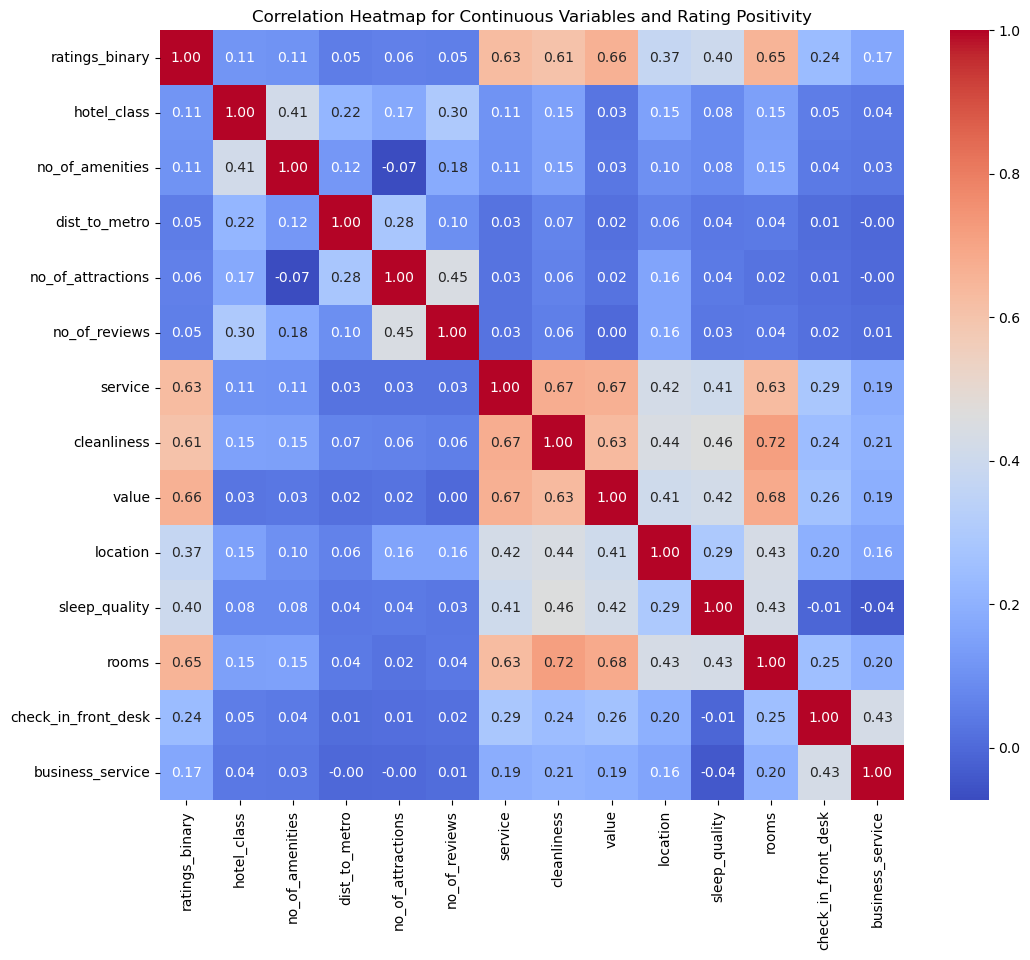

In [10]:
# Step 1: Identify all numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Calculate correlation matrix
corr_matrix = df[['ratings_binary'] + continuous_cols].corr()

# Generate heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Continuous Variables and Rating Positivity')
plt.show()

# Step 3: Feature engineering

## 3.1. Categorical variables: One-hot coding

- **Binary categorical variable ('sentiment')**

In [ ]:
# 'Sentiment': 0 = negative, 1 = positive

df['sentiment'] = df['sentiment'].apply(lambda val: 1 if val == 'positive' else 0)

- **Nominal categorical variable ('price_level')**

In [ ]:
df['price_level'].value_counts()

In [ ]:
# Create a one-hot encoded set of the 'price_level' values, using pd.get_dummies() & Convert boolean columns to integer (0/1):
price_level_set = pd.get_dummies(df['price_level'], prefix = 'price_level').astype(int)

# Concatenate this set back to the dataFrame
df = pd.concat([df, price_level_set], axis=1)

# Let's now have a look:
df.head()

In [ ]:
# Now, we no longer need 'Property_Area' column after encoding it. Hence, we will drop this column:

df = df.drop(['price_level'], axis = 1)

## 3.2. Numerical variables: Standardize

We'll investigate the variance of columns having numerical variables in the dataset to determine which features should be standardized.

In [ ]:
# Step 1: Identify all numeric columns
#numeric_cols = df.select_dtypes(include=[np.number])

# Step 2: Exclude boolean columns (columns with exactly 2 unique values)
#continuous_cols = numeric_cols.loc[:, numeric_cols.nunique() > 2].columns.tolist()

# Step 3: Calculate variance for only the continuous columns
variance = df[continuous_cols].var()

print(variance)

In [ ]:
# Calculate skewness for these columns
skewed_features = df[continuous_cols].apply(lambda x: x.skew()).sort_values(ascending=False)
print("\nSkewness of Continuous Numeric Features:")
print(skewed_features)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Columns to standardize based on high variance and skewness
columns_to_standardize = ['no_of_reviews', 'no_of_amenities', 'dist_to_metro', 
                          'no_of_attractions']

# Initialize the scaler
scaler = StandardScaler()

# Apply the scaler only to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Check the standardized data
print(df[columns_to_standardize].head())

In [ ]:
# Re-check variance:

print(df[continuous_cols].var())

# Correlation heatmap

### Correlation for continous variables

### Correlation for categorical variables